# 🧪LAB: Polynomial Regression as a First Approximation to Non-Linear Problems

In this lab, you will explore **Polynomial Regression** as a simple and intuitive extension of linear models that allows us to handle **non-linear** relationships between predictors and the target variable. While linear regression assumes a straight-line relationship, polynomial regression allows models to capture curves by introducing **non-linear transformations** of the original features. This a great starting point for thinking about **model complexity** and **non-linearity**, and will also be a first approximation to dealing with non-linear problems. Subsequent labs will concentrate on more advance models for this, such as **support vector machine** and **neural networks**.

---

**Collaboration Note**: This assignment is designed to support collaborative work. We encourage you to divide tasks among group members so that everyone can contribute meaningfully. Many components of the assignment can be approached in parallel or split logically across team members. Good coordination and thoughtful integration of your work will lead to a stronger final result.

--- 

In total, this lab assignment will be worth **100 points**.

--- 
**Submission notes**:

* Write down all group members' names, or at least the group name (if you have one and you previously provided it), in the first cell of the notebook.

* Verify that the notebook runs as expected and that all required outputs are included.


In [2]:
NAME(s) = "Nyla Upal, Anaya Nath, William Wert"

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2040043564.py, line 1)

## 1. Work with synthetic data (35 points)

### a. Generate the data
    
- Create a random variable `x` with at least 100 samples drawn from a Gaussian distribution (e.g., mean = 0, standard deviation = 1).

- Define a new variable `y` as a non-linear function of this `x`. You can add noise to make the task more realistic.

(*Hint*: Example of a non-linear function: `y = sin(x) + 0.3 * x² + noise`)

In [1]:
# [Your code here]
import numpy as np 

X = np.random.normal(0, 1, 300)
X = X.reshape(-1,1)
y = np.sin(X) + 0.3 * (X**2) + np.random.normal(0,1,300).reshape(-1,1)

- Why do you think it is important to start with a synthetic dataset before using a real one? Elaborate your answer

It is important to make sure you know the methods to fit a regression correctly on synthetic data before working on the real data. 

### b. Fit and Visualize Polynomial Regression

- First, fit a linear regression model using `LinearRegression` from `sklearn.linear_model`.  
  Plot your predictions over the scatterplot of your original `x` and `y` data.

- Then, apply a polynomial transformation to `x` using `PolynomialFeatures` from `sklearn.preprocessing`.  
  Try increasing the **degree** (e.g., 2, 3, 5, 7) and for each case:
  - Fit a new model on the transformed features. 
  - Plot the predictions on top of the data.
  - Evaluate the model using metrics like MSE, MAE, and R².

**Important**: You should make use of pipelines to combine preprocessing and modeling steps cleanly.

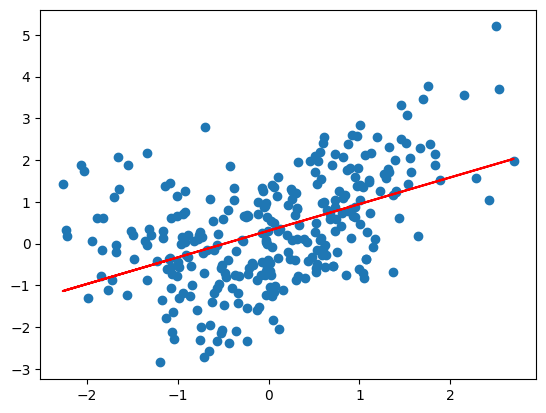

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

reg = LinearRegression()
reg.fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.show()

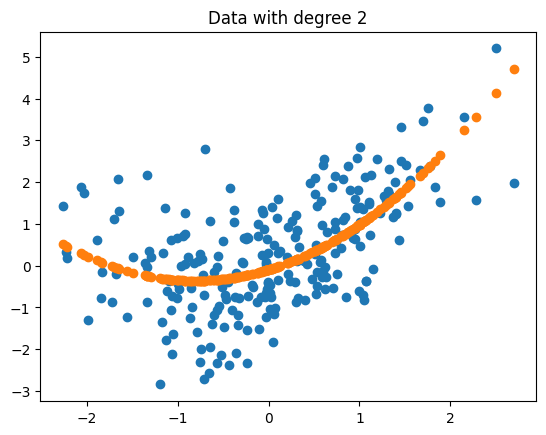

For degree 2 the R^2 was 0.17275419175895435, MAE was 0.9126010605912396, MSE was 1.2838667020364964


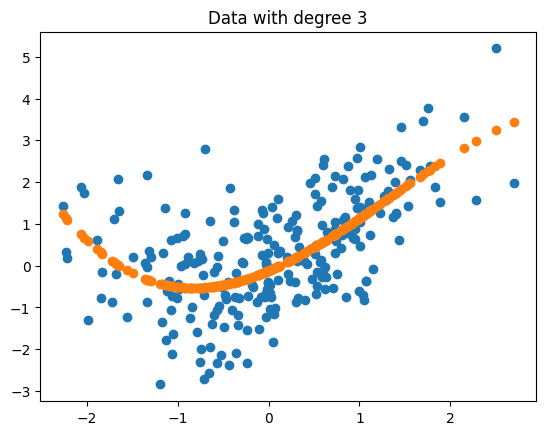

For degree 3 the R^2 was 0.2088088433270221, MAE was 0.9079026392334195, MSE was 1.2279107018481192


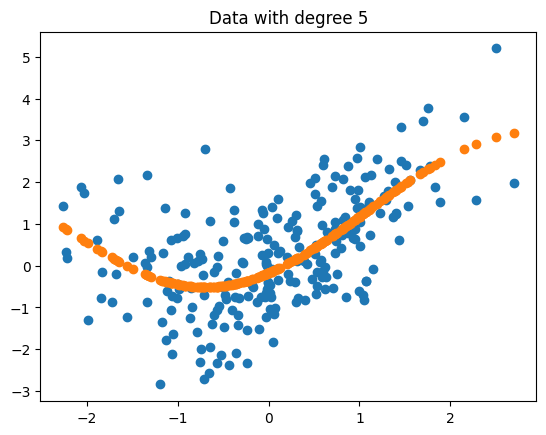

For degree 5 the R^2 was 0.2109287867500953, MAE was 0.9097582737805997, MSE was 1.224620597813779


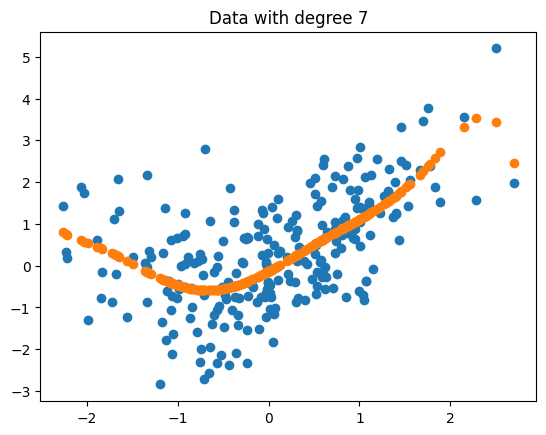

For degree 7 the R^2 was 0.20244223847775622, MAE was 0.9130549522343082, MSE was 1.2377915279454752


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

degrees = [2,3,5,7]
for i in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=i)),('lin_reg', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)

    plt.scatter(X_train,y_train)
    plt.scatter(X_train, y_pred)
    plt.title(f"Data with degree {i}")
    plt.show()
    print(f"For degree {i} the R^2 was {pipeline.score(X_test, y_test)}, MAE was {mean_absolute_error(y_test, pipeline.predict(X_test))}, MSE was {mean_squared_error(y_test, pipeline.predict(X_test))}")

- **Reflection**: What do you observe about model fit and complexity? Please, elaborate.

YOUR TEXT HERE     
It seems that model fit gets better with complexity to a certain point, then model fit starts getting too overfit as it gets too complex and has worse fit. It seems that the degree 3 is the best balance. Looking at R^2, it seems that 3 has the highest value and the lowest MAE and MSE, showing it is the best fit.  

## 2. Application to Real Data

Now, you will apply polynomial regression to a real-world dataset that relates the **compressive strength of high-performance concrete** to various input features such as **cement**, **water**, and **aggregate content**. This dataset originates from a study exploring predictive modeling of concrete strength using neural networks. You instead will start wit hpolynomial regression, a simple approach but that will let you investigate how well it can capture the potentially non-linear relationship between input features and compressive strength.

You can find the dataset here: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Data.xls, in addition to its metadata: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Readme.txt.

Reference:

- I-Cheng Yeh, *Modeling of strength of high performance concrete using artificial neural networks*, Cement and Concrete Research, Vol. 28, No. 12, pp. 1797–1808 (1998).

### a. Load the data and create a training and test set. The test set should contain at least 20% of the observations.

In [4]:
# [Your code here]
import pandas as pd

concrete = pd.read_csv('Concrete_Data.csv')
concrete.head()
Y = concrete['Concrete compressive strength(MPa, megapascals) ']
X = concrete.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

### b. For each input variable in the dataset, create a **scatterplot** against the outcome variable (`Compressive_Strength`).

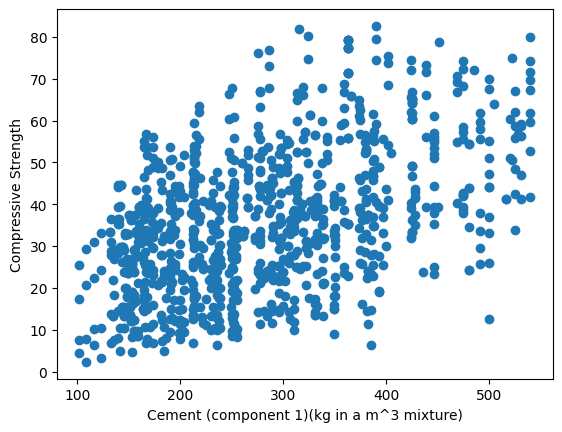

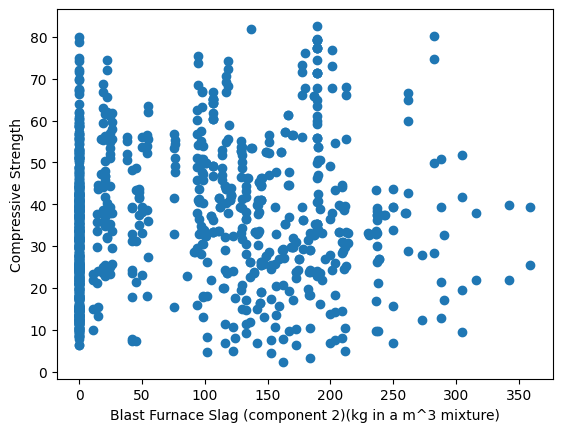

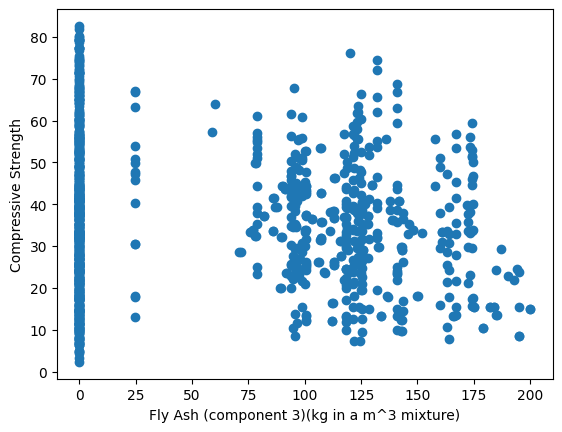

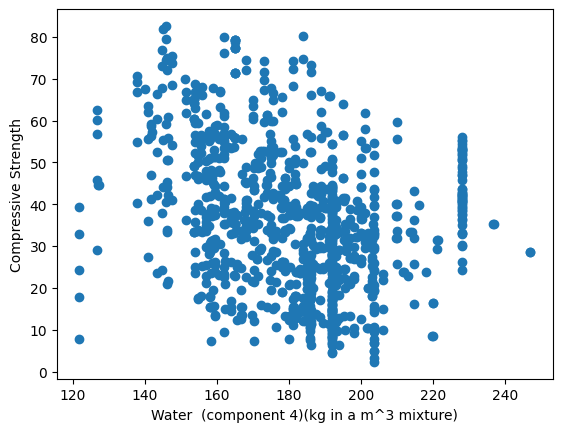

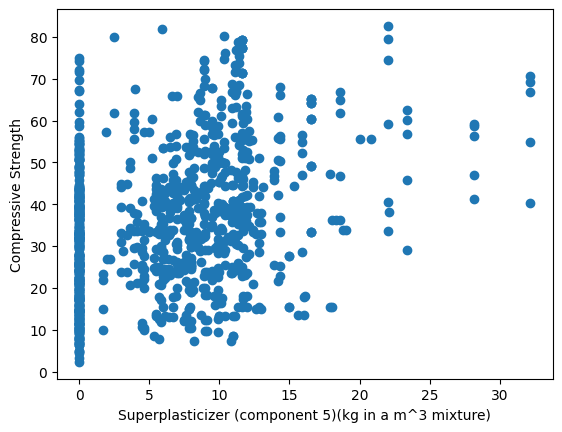

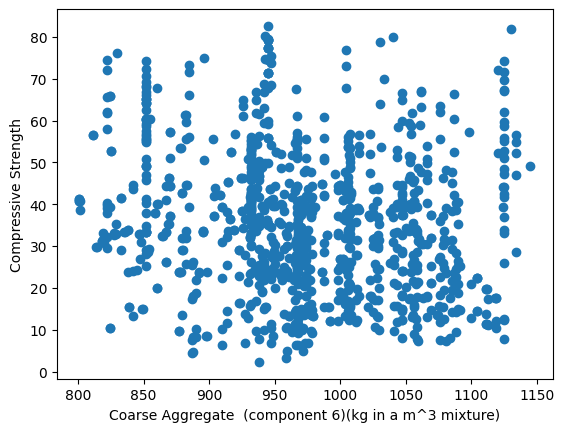

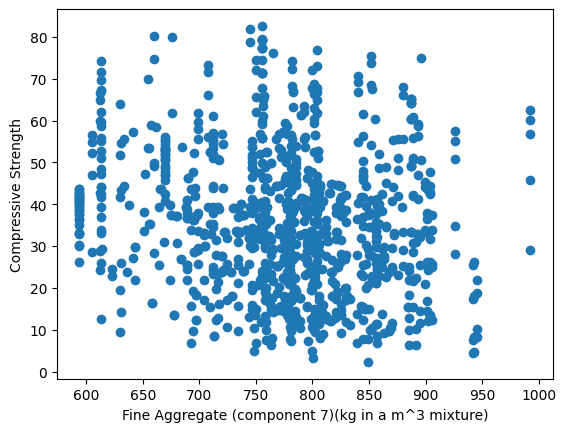

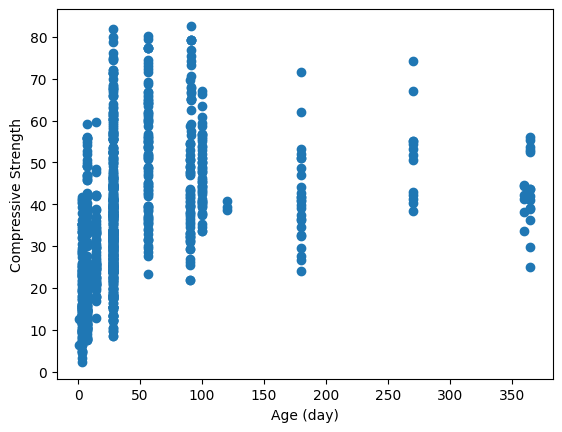

In [5]:
# [Your code here]
variables = X.columns.tolist()
for i in variables:
    plt.scatter(concrete[i], concrete['Concrete compressive strength(MPa, megapascals) '])
    plt.xlabel(i)
    plt.ylabel('Compressive Strength')
    plt.show()

### c. Reflect: Do any variables appear to have a non-linear relationship with the output?  Why might this suggest the need for polynomial regression? Please elaborate on your answers.

They all seem to have loose relationships. For superplasticizer, age, and water it looks like there could be somewhat of a polynomial relationship. You would need polynomial regression to properly represent the data and add higher features to represent the relationship better without simplifying it to a linear base. 

### d. You have probably become convinced that modeling non-linear relationships is necessary in this dataset.  To do this, you’ll be using `PolynomialFeatures` to expand the input features.

But before moving on to modelling, you will first inspect how the number of features grows as you increase the degree of the expansion.

- Apply `PolynomialFeatures` to your input variables using degrees 1 through 5.
- For each degree, print the number of resulting features.


In [6]:
# [Your code here]
degrees = [1,2,3,4,5]
for i in degrees:

    features = PolynomialFeatures(degree=i)
    features.fit(X_train)

    print(f"Degree {i} has {features.n_output_features_} features")

Degree 1 has 9 features
Degree 2 has 45 features
Degree 3 has 165 features
Degree 4 has 495 features
Degree 5 has 1287 features


### e. Discuss with your group and reflect:
    
- How does the number of features grow with increasing degree?
- What implications might this have for model training and interpretability?

Please elaborate on your answers.

YOUR TEXT HERE
The number of features is growing at an exponential level compared to the degree. As you are increasing the degree in the model it has a vast amount of features that may not be interpretable and computationally expensive. Having a lot of features may cause multicollinearity, so to address this you should use regularization.  

In [ ]:
# [Your code here]

### f. You will fit a LASSO regression model on the expanded features. But before jumping into the implementation, discuss and reflect on the following with your group:

- Why are we using LASSO instead of plain linear regression?
- What are the benefits of regularization in this context?
- What preprocessing steps are necessary for LASSO to work properly (e.g., scaling)?

Please elaborate on your answers.

YOUR TEXT HERE    
LASSO regression adds a penalty so the regression does not overfit. Because the expansion results in many features, we want to have a penalty for adding more features so the model does't overfit to the data. LASSO specifically adds a regularization that is proportional to the value of the coefficients, so the penalty will help you find the predictors that are actually important and will select features. The preprocessing before doing LASSO includes scaling the data and doing the train test split. 

### g. Now, implement both steps together. That is:

- Apply `PolynomialFeatures` to expand the input features.
- Fit a **Lasso regression model** using two different combinations of:
  - Polynomial `degree`
  - LASSO `alpha` value

Evaluate and compare the models using metrics such as **MSE**, **MAE**, or **R²** on a validation set. 

Again, you should make use of pipelines for this.

In [7]:
# [Your code here]
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

degrees = [3,4]
alphas = [1,2]

for i in range(2):

    pipeline = Pipeline([
        ('polynomial', PolynomialFeatures(degree=degrees[i])),
        ('lasso', Lasso(alpha=alphas[i]))
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"For degree {degrees[i]} and alpha {alphas[i]} the R^2 was {pipeline.score(X_test, y_test)}")
    print(f"MAE was {mean_absolute_error(y_test, y_pred)}, MSE was {mean_squared_error(y_test, y_pred)}")

For degree 3 and alpha 1 the R^2 was 0.840820932787288
MAE was 4.831208473715816, MSE was 40.39346869661014
For degree 4 and alpha 2 the R^2 was 0.8670589742685555
MAE was 4.534122971553637, MSE was 33.73527220260969


/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.270e+04, tolerance: 2.349e+01
  model = cd_fast.enet_coordinate_descent(
/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e+03, tolerance: 2.349e+01
  model = cd_fast.enet_coordinate_descent(


### h. Discuss and reflect with your group:
- How should we go about finding the best combination of degree and alpha?
- What methods could we use to explore this space systematically?
- Is there a data-driven approach for this?

Please elaborate on your answers

YOUR TEXT HERE      
You should find a systematic way to see how you should modify the degree and the alpha to get the best results. To properly explore this you should try seeing if a higher or lower alpha and degree yields better results. You should also investigate if the two of these have an impact on eachother and if they need to be varied in a certain direction together which would impact the outcome. You can do this by testing values in a specific way that helps you get this information, and based on this you can create data that should help you see what relationships they have with the outcome measure and you can then find the best combiation. You can test the different hyperparameters using cross validation and use a grid search to find the ones that output the best values. 

### i. Now, expand your model evaluation to include 5 polynomial degrees (1 through 5) and 10 different alpha values for Lasso, spaced logarithmically (e.g., using `np.logspace`)

Now, do the following:

- For each combination of degree and alpha, compute the cross-validated error (e.g., MSE).
- Store the results and generate a plot that summarizes model performance.

In [10]:
print("X shape:", X_train.shape)
print("y shape:", y_train.shape)

In [16]:
# [Your code here]
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

degrees = [1,2,3,4,5]
alphas = np.logspace(-3,1, 10)
results = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse = np.zeros((len(alphas), len(degrees)))

for i, alpha in enumerate(alphas):
    for j, degree in enumerate(degrees):

        pipeline = Pipeline([
            ('polynomial', PolynomialFeatures(degree=degree)),
            ('scale', StandardScaler()),
            ('lasso', Lasso(alpha=alpha))
        ])

        scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        mse[i, j] = -scores.mean() #have to negate the score since using neg mse

/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+04, tolerance: 1.931e+01
  model = cd_fast.enet_coordinate_descent(
/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.375e+04, tolerance: 1.823e+01
  model = cd_fast.enet_coordinate_descent(
/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.702e+03, tolerance: 1.827e+01
  model = cd_fast.enet_coordinate_descent(
/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.540e+03, tolerance: 1.924e+01
  model = cd_fast.enet_coordinate_descent(
/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

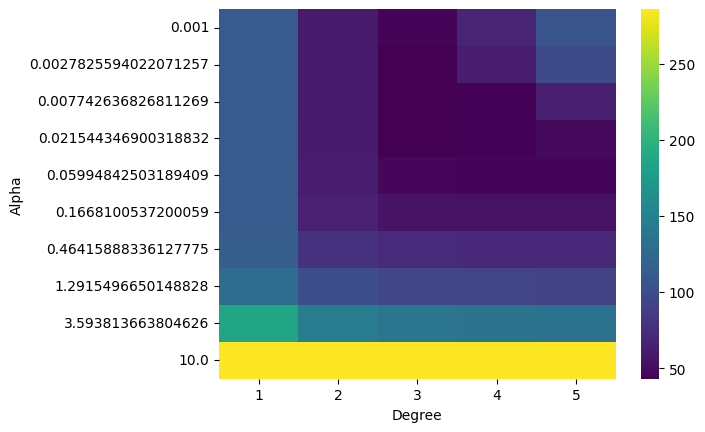

In [17]:
import seaborn as sns 

sns.heatmap(mse, xticklabels=degrees, yticklabels=alphas, cmap="viridis")
plt.xlabel("Degree")
plt.ylabel("Alpha")
plt.show()

### j. Discuss and reflect with your group:

- Why did you choose this type of plot to summarize results?
- Can you think of a better or more informative visualization?

Please elaborate on your answers

I chose a heatmap so it would display all 3 axes that we wanted to. You can see the alphas on the x, degrees on the y, and the mse is the shade of each section, so you are able to get information from all of them in one graph. Using color to show mse may make it somewhat difficult to interpret as it is hard to see the slight shade differences, but using the color palette viridis makes these somewhat more distinct. 

### k. Using the most optimal model (based on your previous cross-validation results), generate predictions on the test set. In addition, create a plot comparing the predicted values against the observed values.

/workspaces/DS4021-Labs-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+04, tolerance: 2.349e+01
  model = cd_fast.enet_coordinate_descent(


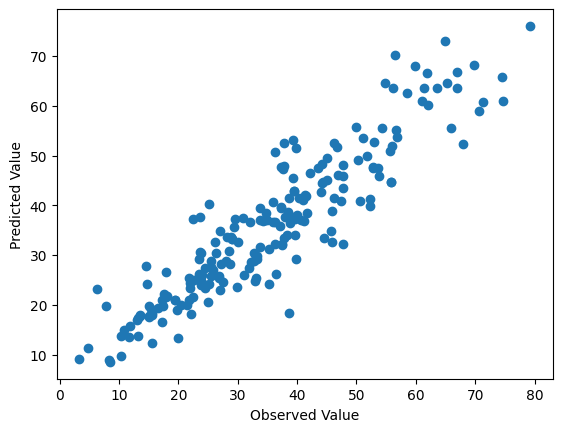

In [ ]:
# [Your code here]
pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=3)),
    ('lasso', Lasso(alpha=0.003))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.show()

### h. Identify the most important features from the LASSO model.

In [19]:
# [Your code here]
polynomial_features = pipeline.named_steps['polynomial'].get_feature_names_out(input_features=X.columns)
coefficients = pipeline.named_steps['lasso'].coef_

pd.set_option('display.max_colwidth', None)
coeffs = pd.DataFrame({'feature':polynomial_features, 'coefficient':coefficients})
coeffs.sort_values(by='coefficient', key=abs, ascending=False).head(10)

,feature,coefficient
5,Superplasticizer (component 5)(kg in a m^3 mixture),2.416278
4,Water (component 4)(kg in a m^3 mixture),0.689289
1,Cement (component 1)(kg in a m^3 mixture),0.196591
3,Fly Ash (component 3)(kg in a m^3 mixture),-0.081044
7,Fine Aggregate (component 7)(kg in a m^3 mixture),0.080883
8,Age (day),-0.048578
38,Superplasticizer (component 5)(kg in a m^3 mixture) Age (day),0.031399
2,Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.024045
35,Superplasticizer (component 5)(kg in a m^3 mixture)^2,0.011352
26,Fly Ash (component 3)(kg in a m^3 mixture) Superplasticizer (component 5)(kg in a m^3 mixture),-0.008643


Reflect:
- Do the important features make intuitive sense?
- Are any of them polynomial interaction terms? What might that tell you?

Please, elaborate on your answers.

YOUR TEXT HERE

## 3. Collaboration Reflection (5 points)

As a group, briefly reflect on the following (max 1–2 short paragraphs):

- How did the group dynamics work throughout the assignment?
- Were there any major disagreements or diverging approaches?
- How did you resolve conflicts or make final modeling decisions?
- What did you learn from each other during this project?

For this lab, we decided to look through all of the parts individually and compare answers as we worked through all of the questions. While doing this we were able to help each other understand parts that others were struggling with but also ensure that all of us knew how to do the code. We did end up creating the graphs differently, but we ended up going with the one that was the easiest to interpret and best showed the information. 